<a href="https://www.kaggle.com/code/simronw/iris-classification-using-decision-tree?scriptVersionId=180273784" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # for using DTA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# **Import the data**

In [2]:
# Import Iris dataset into pandas DataFrame
df = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [3]:
# Displaying first 10 rows of the dataset
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# **Explore the data**

In [4]:
# Number of rows and columns
df.shape

(150, 6)

In [5]:
# Describing summary statistics of numerical columns
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Analyzing Datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Droppping the Id column as it is not required
df.drop(columns='Id', inplace=True)

In [8]:
# Checking for missing values present in the dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# Counting values of each Species
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

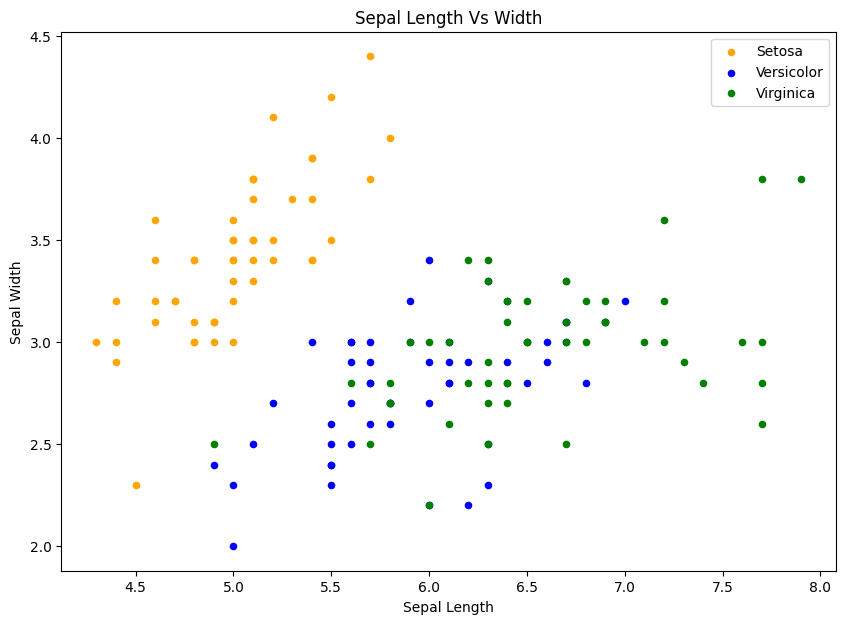

In [10]:
# Analysing similarity between Sepal Length VS Sepal Width
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()


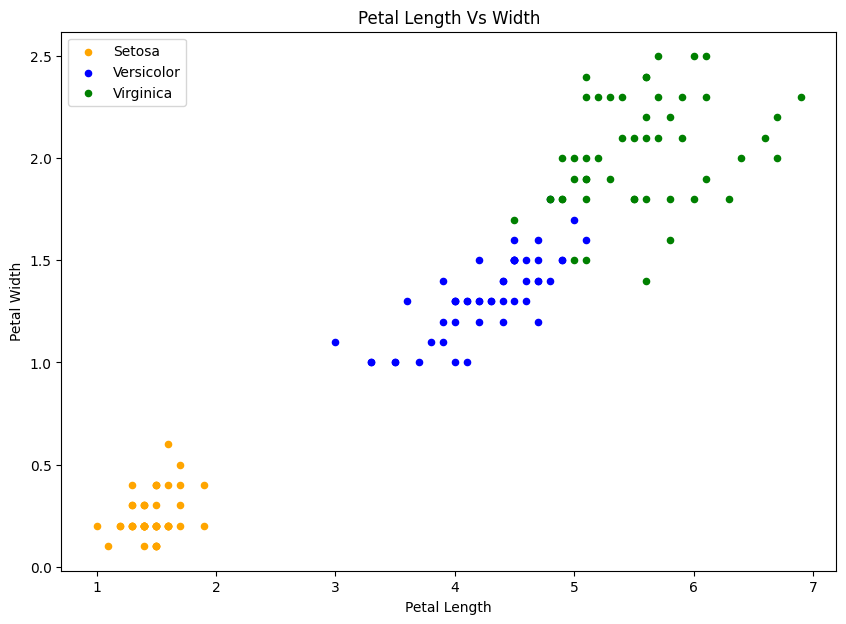

In [11]:
# Analysing similarity between Petal Length VS Petal Width
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

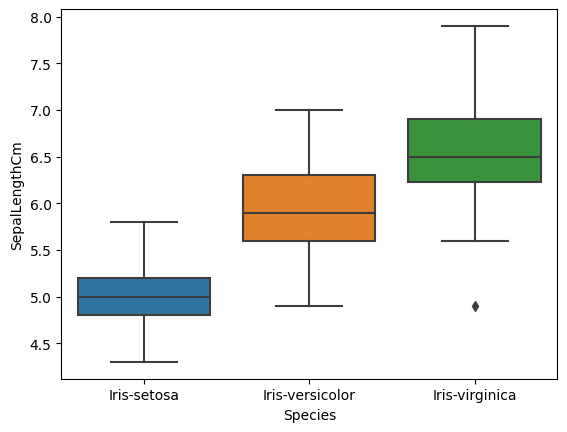

In [12]:
# Analysing the variation in Sepal length of different Species
sns.boxplot(x="Species", y ="SepalLengthCm", data=df)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

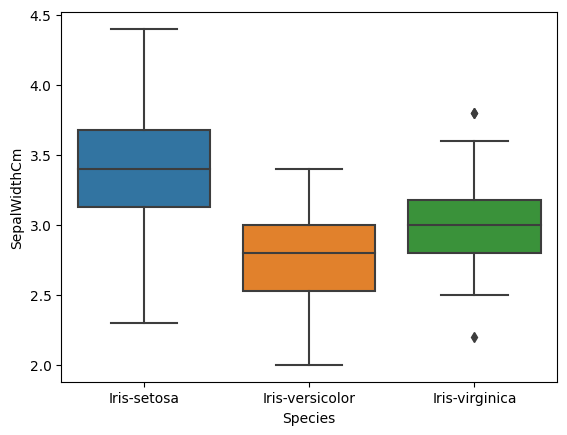

In [13]:
# Analysing the variation in Sepal width of different Species
sns.boxplot(x="Species", y ="SepalWidthCm", data=df)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

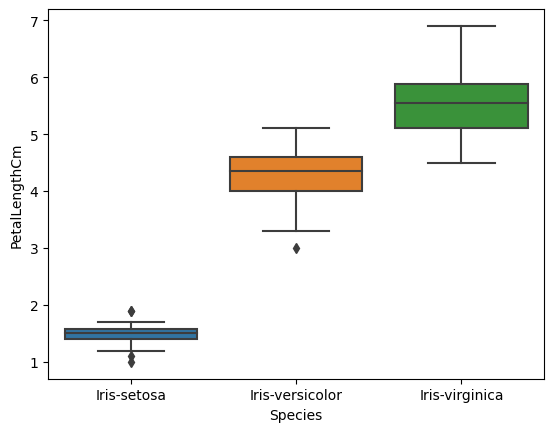

In [14]:
# Analysing the variation in Petal length of different Species
sns.boxplot(x="Species", y ="PetalLengthCm", data=df)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

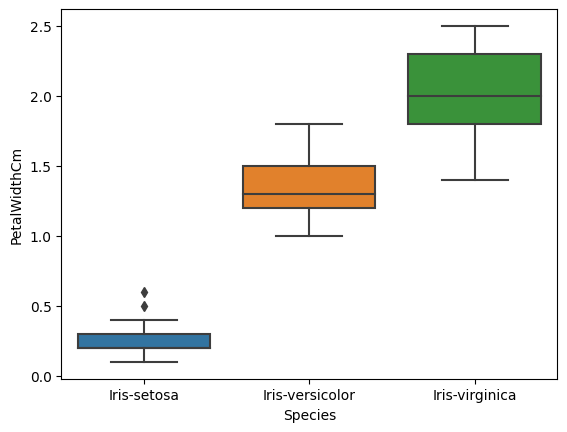

In [15]:
# Analysing the variation in Petal length of different Species
sns.boxplot(x="Species", y ="PetalWidthCm", data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` 

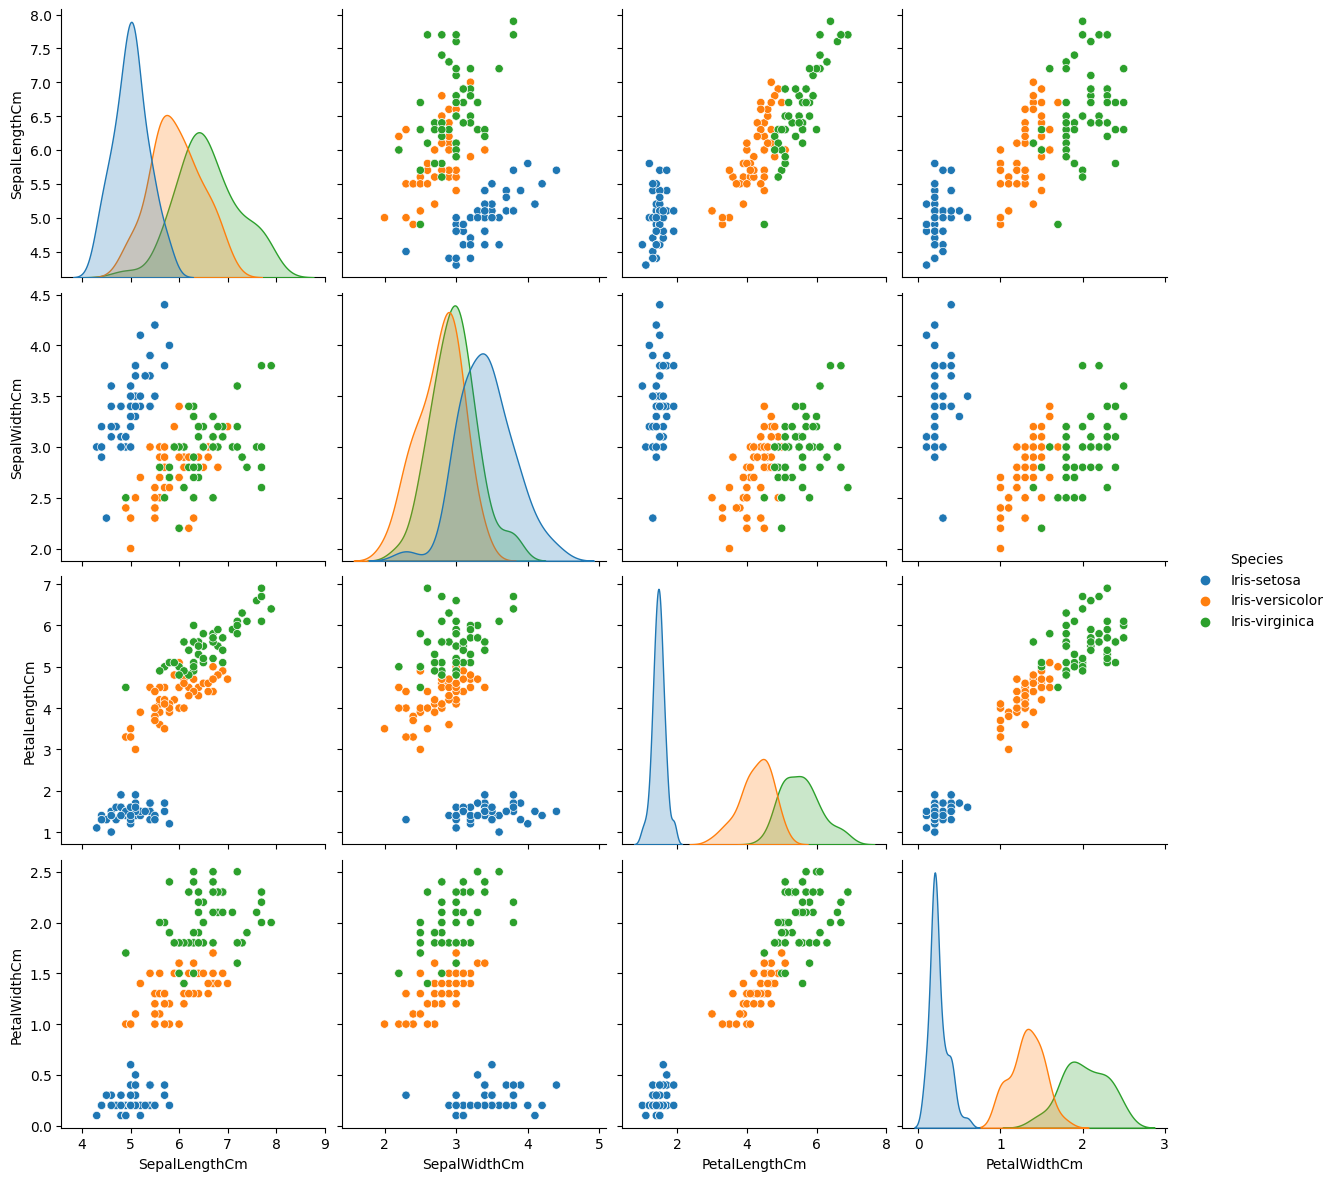

In [16]:
# Analysing the relationship between Sepal length, Sepal Width and Petal Length, Petal Width of different Species
sns.pairplot(df, hue='Species', size=3)

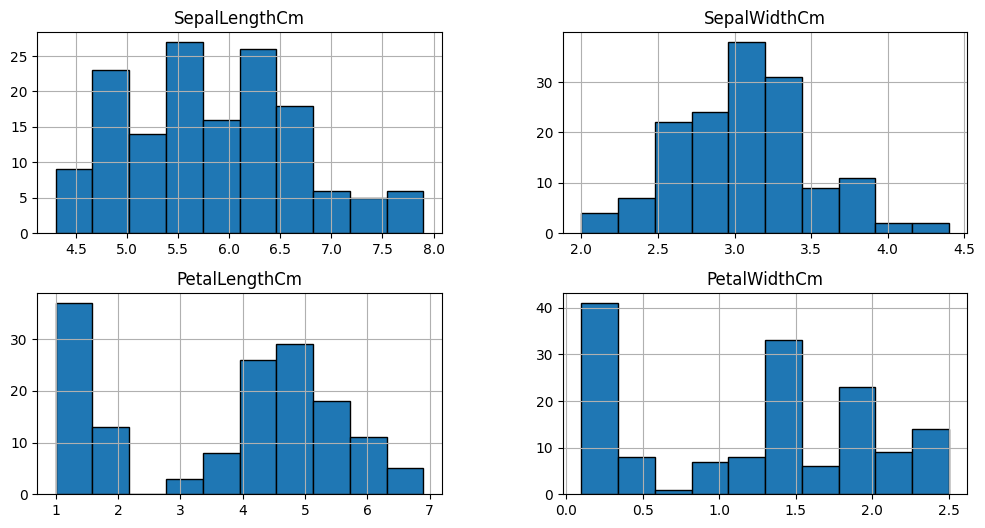

In [17]:
# Analysing the distribution of Sepal Length, Width and Petal Length, Width
df.hist(edgecolor='black', linewidth=1.0)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

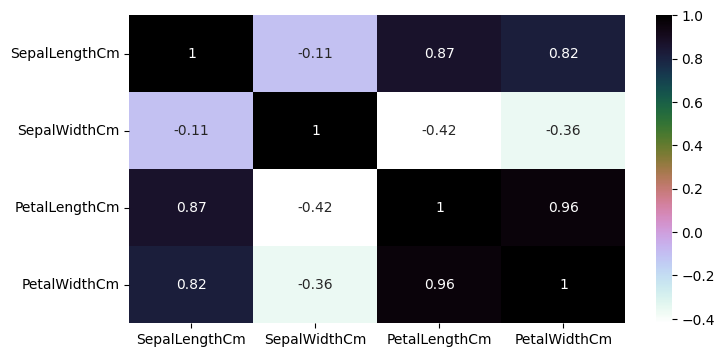

In [18]:
# Calculate the correlation matrix, excluding the 'Species' column
corr_matrix = df.drop('Species', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='cubehelix_r')
plt.show()

Observation---> The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

Steps To Be followed When Applying an Algorithm

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model

# **Splitting The Data into Training And Testing Dataset**

**Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.
Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data**

In [19]:
train, test = train_test_split(df, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


# **Train the model**

In [20]:
# Training the Model
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [21]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
111,6.4,2.7,5.3,1.9
147,6.5,3.0,5.2,2.0
146,6.3,2.5,5.0,1.9
75,6.6,3.0,4.4,1.4
117,7.7,3.8,6.7,2.2


In [22]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
21,5.1,3.7,1.5,0.4
108,6.7,2.5,5.8,1.8
70,5.9,3.2,4.8,1.8
16,5.4,3.9,1.3,0.4
61,5.9,3.0,4.2,1.5


In [23]:
train_y.head()

111     Iris-virginica
147     Iris-virginica
146     Iris-virginica
75     Iris-versicolor
117     Iris-virginica
Name: Species, dtype: object

# **Decision Tree**

In [24]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9555555555555556


We used all the features of iris in above models. Now we will use Petals and Sepals Seperately.


In [25]:
# Creating Petals And Sepals Training Data
petal = df[['PetalLengthCm','PetalWidthCm','Species']]
sepal = df[['SepalLengthCm','SepalWidthCm','Species']]

In [26]:
# Training the Petal model
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

In [27]:
# Training the Sepal Model
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

In [28]:
# Using decision tree classifier
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


**Observations:
Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.**